# <center>Convolutional Neural Networks</center>
## <center>Inclass Project 4 - MA4144</center>

This project contains 5 tasks/questions to be completed, some require written answers. Open a markdown cell below the respective question that require written answers and provide (type) your answers. Questions that required written answers are given in blue fonts. Almost all written questions are open ended, they do not have a correct or wrong answer. You are free to give your opinions, but please provide related answers within the context.

After finishing project run the entire notebook once and **save the notebook as a pdf** (File menu -> Save and Export Notebook As -> PDF). You are **required to upload this PDF on moodle**.

***

## Outline of the project

The aim of the project is to practically learn and implement about CNN. This project will have two main sections.

Section 1: Build a convolutional layer and pooling layer from scratch. Then test them on a sample image.

Section 2: Use the Keras library to implement a CNN to classify images on the [CIFAR10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).

***


Use the below cell to use any include any imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from keras.preprocessing.image import load_img
import keras

ValueError: Key backend: 'module://matplotlib_inline.backend_inline' is not a valid value for backend; supported values are ['gtk3agg', 'gtk3cairo', 'gtk4agg', 'gtk4cairo', 'macosx', 'nbagg', 'notebook', 'qtagg', 'qtcairo', 'qt5agg', 'qt5cairo', 'tkagg', 'tkcairo', 'webagg', 'wx', 'wxagg', 'wxcairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template']

## Section 1: Convolution and Pooling

**Q1** In the following cell, implement a method called create_padding. The method will take in input_image ($n \times m$) and will return a zero-padded image called output_image of dimension $(n + 2d) \times (m + 2d)$ where $d$ is the padding thickness on either side.

In [ ]:
def create_padding(input_image, d):
    
    n, m = input_image.shape
    output_image = np.zeros((n + 2 * d, m + 2 * d))
    output_image[d:n + d, d:m + d] = input_image
    
    return output_image
    

**Q2** In the following cell, implement a method called convolution. The method will take in input_image ($n \times m$), kernel ($k \times k$) and will return output_image of dimension $(n - k + 1) \times (m - k + 1)$. The output_image is the result of the convolution between input_image and kernel. You may assume that the stride is $1$.

In [83]:
def convolution(input_image, kernel):
    
    m, n = input_image.shape
    k, _ = kernel.shape

    output_dim_n = n - k + 1
    output_dim_m = m - k + 1
    output_image = np.zeros((output_dim_n, output_dim_m))
    
    # Perform convolution
    for i in range(output_dim_n):
        for j in range(output_dim_m):
            region = input_image[i:i+k, j:j+k]
            output_image[i, j] = np.sum(region * kernel)
    return output_image

**Q3** In the following cell, implement a method called pooling. The method will take in input_image ($n \times m$), $p$ the pooling dimension, pooling_type (either max_pooling or avg_pooling) and will return output_image of dimension $(n - p + 1) \times (m - p + 1)$. The output_image is the result of performing pooling on input_image by a window of dimension $p \times p$. You may assume that the stride is $1$.

In [84]:
def pooling(input_image, p, pooling_type = "max_pooling"):
    
    m, n = input_image.shape
    output_dim_n = n - p + 1
    output_dim_m = m - p + 1
    output_image = np.zeros((output_dim_n, output_dim_m))

    if pooling_type == "max_pooling":
        #TODO
        for i in range(output_dim_n):
            for j in range(output_dim_m):
                region = input_image[i:i+p, j:j+p]
                output_image[i, j] = np.max(region)

    elif pooling_type == "avg_pooling":
        #TODO
        for i in range(output_dim_n):
            for j in range(output_dim_m):
                region = input_image[i:i+p, j:j+p]
                output_image[i, j] = np.mean(region)

    else:
        print("Error: Invalid pooling type")
        return

    return(output_image)
    

The 'lena' image is widely used for image processing experiments and has been a benchmark image until recently.
We will use a $512 \times 512$ grayscale lena sample to test our convolution and pooling implementations.

**Q4** In the following perform convolution on lena. Make sure you use padding appropriately to maintain the image size after convolution. However, pooling should be done on an unpadded image and image size may not be preseved after pooling. Use the following kernels to perform convolution separately.

1. $\begin{bmatrix} +1 & 0 & -1 \\ +1 & 0 & -1 \\ +1 & 0 & -1 \end{bmatrix}$
   
2. $\begin{bmatrix} -1 & -1 & -1 \\ 0 & 0 & 0 \\ +1 & +1 & +1 \end{bmatrix}$
 
3. $\begin{bmatrix} -1 & 0 & +1 \\ -2 & 0 & +2 \\ -1 & 0 & +1 \end{bmatrix}$

4. $\begin{bmatrix} +1 & +2 & +1 \\ 0 & 0 & 0 \\ -1 & -2 & -1 \end{bmatrix}$

5. Any other kernel that you may find interesting.

<font color='blue'>Explain what the above kernels (including your choice) will do to the image.</font>

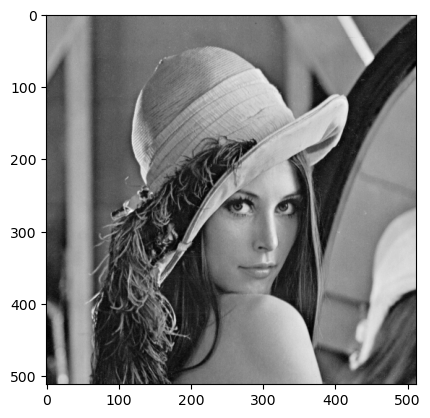

In [85]:
lena = load_img('lena.gif' , color_mode="grayscale")
plt.imshow(lena ,cmap="gray")
plt.show()

**Answer** 

1.) Vertical Edge Detection Kernel -  Detects vertical edges in the image. 

2.) Horizontal Edge Detection Kernel - Detects Horizontal edges in the image.  

3.) Sobel Kernel (Vertical Edge Detection) - Detects vertical gradients in the image.This will capture finer details and gradient changes with more sensitivity than normal vertical edge detection kernel. 

4.) Sobel Kernel (Horizontal Edge Detection) - Detects horizontal gradients in the image.This will capture finer details and gradient changes with more sensitivity than normal Horizontal edge detection kernel.  

5.) Laplacian Kernel - Detects edges in all directions.

In [86]:
# Convert to a NumPy array
lena_array = np.array(lena)

# Get the shape
shape = lena_array.shape
print("Shape of the image:", shape)


Shape of the image: (512, 512)


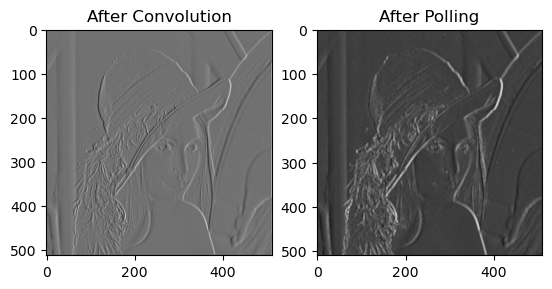

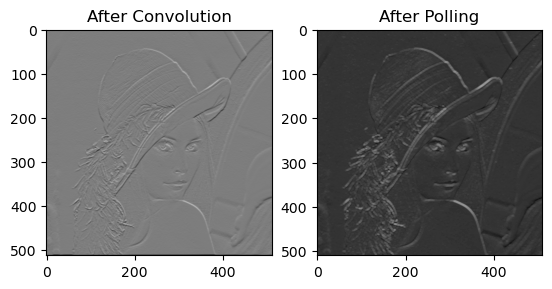

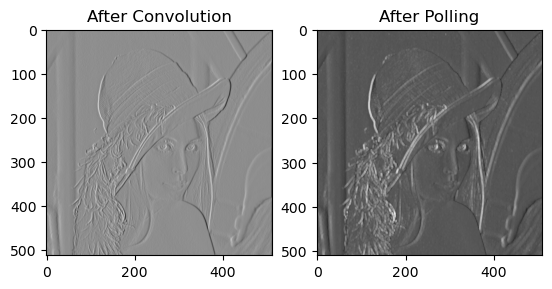

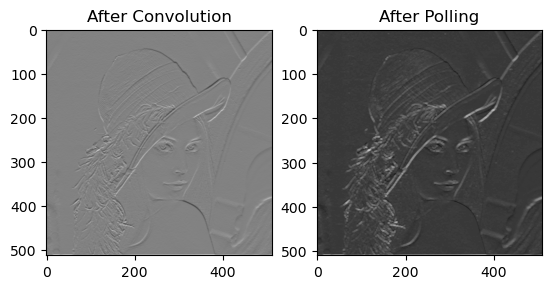

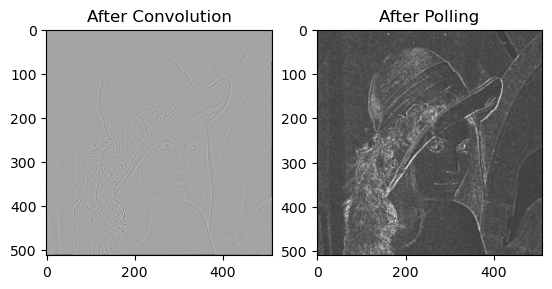

In [87]:
#TODO
#Write code to use your convolution and pooling methods.


# Define kernels
kernels = [
    np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]]),
    np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]),
    np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]),
    np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]]),
    np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])  # Laplacian Kernel 
]


after_padding = create_padding(lena_array,1)

for kernel in kernels:
    
 
    convolute = convolution(after_padding, kernel)
    doing_pooling = pooling(convolute,3)
    plt.subplot(1, 2, 1)
    plt.title('After Convolution')
    plt.imshow(convolute,cmap="gray")
    
    plt.subplot(1, 2, 2)
    plt.title('After Polling')
    plt.imshow(doing_pooling,cmap="gray")

    plt.show()


Show the resulting image after convolution and pooling separately on two subplots (of the same plot) for each kernel. There should be 5 plots with two sub plots in each.

<font color='blue'>Comment on the results of the above experiment. Mention whether you think the experiment was successful, and what your learnt from it.</font>

**Answer**

The experiment was successful.As expected,applying convolution to the image resulted in clear edge detection,with specific features highlighted based on the chosen kernels.Performing max pooling on the convoluted images further emphasized these detected edges, enhancing the clarity of the edge features.From this I learn that that pooling not only reduces the dimensions of the image but also helps accentuate important details.


## Section 2: Using Keras to implement CNN for image classification

This section, unlike the previous projects you are granted full liberty to build the structure of your project appropriately using keras. I have provided only the code to download the cifar10 dataset. After using CNN on the dataset, provide the following. (Note that cifar10 contains rgb images with 3 channels unlike the grayscake image lena we used earlier.)

1. 5-fold cross validation accuracy.
2. Testing accuracy.
3. Confusion matrix of the result.
4. Precision recall for each class.

Note: You are required test on different hyperparameters and network architectures and select decide the best performer based on the cross-validation accuracy.

In [136]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import precision_score, recall_score

In [88]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [100]:
#TODO

#Include necessary code in this cell, or cells added below as required.


print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

y_train[2:6]

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


array([[9],
       [4],
       [1],
       [1]], dtype=uint8)

**y_train is a 2D array,for our classification having 1D array is enough.Therefore lets convert 2D array into 1D.**

In [103]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [102]:
y_test = y_test.reshape(-1,)

In [93]:
#data set has 32x32 colour images in 10 classes
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

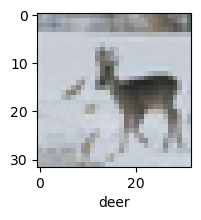

In [108]:
def plot_sample(x, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])
plot_sample(x_train, y_train, 20)

**Normalizing the training data**

In [110]:
x_train = x_train / 255.0
x_test = x_test / 255.0

**1.) 5-fold cross validation accuracy.**

In [140]:
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
fold_accuracies = []
fold_no = 1

def create_model():
    model = keras.models.Sequential([
        keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [141]:
# Create the model once
cnn = create_model()

# Loop through the folds
for train_index, val_index in kf.split(x_train):

    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    print(f'Training fold {fold_no}...')
    
    # Train the model on the current fold
    history = cnn.fit(x_train_fold, y_train_fold, epochs=10, validation_data=(x_val_fold, y_val_fold), verbose=1, batch_size=32)
    
    # Evaluate the model on the validation set and store the accuracy
    scores = cnn.evaluate(x_val_fold, y_val_fold, verbose=0)
    fold_accuracies.append(scores[1])  # Accuracy is the second element in scores
    print(f"Fold {fold_no} - Validation Accuracy: {scores[1] * 100:.2f}%\n")
    
    fold_no += 1

# Calculate and display the mean cross-validation accuracy
mean_accuracy = np.mean(fold_accuracies)
print(f'\n5-Fold Cross-Validation Accuracy: {mean_accuracy * 100:.2f}%')

Training fold 1...
Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 29ms/step - accuracy: 0.3929 - loss: 1.6698 - val_accuracy: 0.5580 - val_loss: 1.2490
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 29ms/step - accuracy: 0.6112 - loss: 1.1019 - val_accuracy: 0.6258 - val_loss: 1.0568
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 29ms/step - accuracy: 0.6920 - loss: 0.8912 - val_accuracy: 0.6765 - val_loss: 0.9274
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 37s 29ms/step - accuracy: 0.7322 - loss: 0.7636 - val_accuracy: 0.6888 - val_loss: 0.9025
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 31ms/step - accuracy: 0.7727 - loss: 0.6469 - val_accuracy: 0.6939 - val_loss: 0.9087
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 31ms/step - accuracy: 0.8045 - loss: 0.5608 - val_accuracy: 0.7143 - val_loss: 0.8659
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.8389 - loss: 0.4650 - val_accuracy: 0.7012 - val_loss: 0.9525
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step -

**Testing accuracy**

In [149]:
cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7015 - loss: 2.9886


[3.0530436038970947, 0.6937999725341797]

In [143]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


array([[1.4024214e-09, 7.6953923e-16, 1.9810034e-10, 9.9852055e-01,
        1.1749761e-13, 1.4785491e-03, 8.8095499e-07, 8.6714585e-16,
        2.5413323e-09, 1.4084619e-15],
       [1.9524619e-16, 9.9462944e-01, 5.7716273e-37, 2.9747211e-30,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        5.3704916e-03, 2.7142292e-11],
       [4.2843143e-07, 4.9100968e-04, 6.2479327e-12, 3.2541098e-11,
        2.5646694e-16, 5.4859454e-14, 2.1991241e-12, 3.2136618e-10,
        9.9950844e-01, 2.2223370e-08],
       [9.9976897e-01, 2.2518918e-12, 4.3501920e-08, 2.5392074e-15,
        3.4821665e-13, 1.3466914e-23, 1.1462477e-18, 1.8818316e-23,
        2.3111567e-04, 2.5880690e-19],
       [7.1493888e-35, 2.7334271e-26, 3.8777013e-17, 2.9764490e-18,
        9.9999994e-01, 1.7824650e-26, 4.2429192e-11, 2.0051504e-33,
        4.4188766e-30, 6.8056471e-27]], dtype=float32)

In [144]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 8, 0, 4]

In [145]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

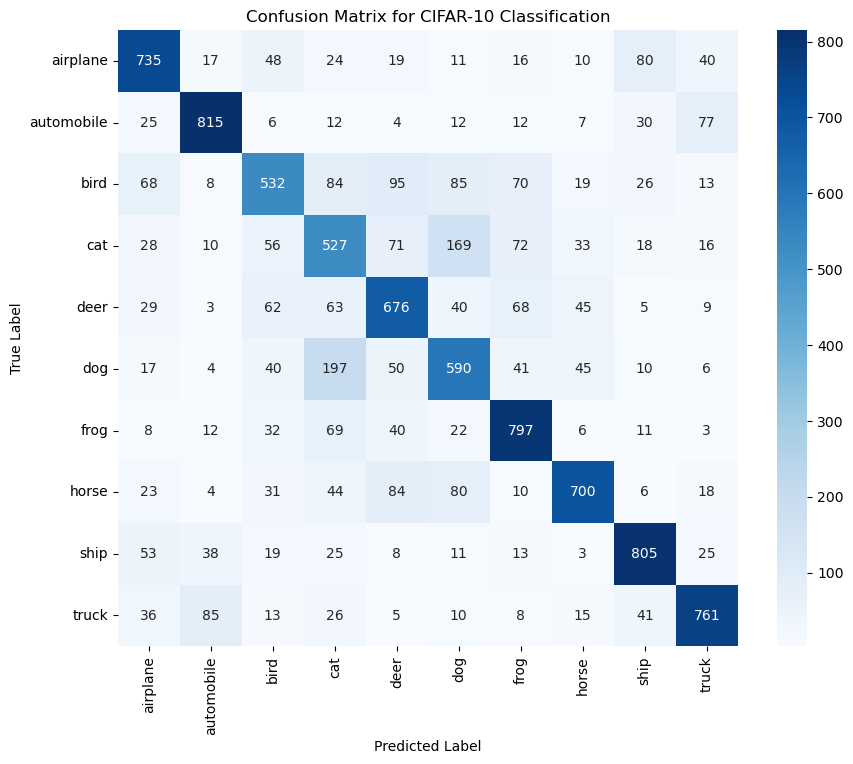

In [146]:
conf_matrix = confusion_matrix(y_test, y_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for CIFAR-10 Classification')
plt.show()

In [137]:
# Calculate precision and recall for each class
precision = precision_score(y_test, y_classes, average=None)
recall = recall_score(y_test, y_classes, average=None)


# Display precision and recall for each class
for i, label in enumerate(classes):
    print(f"Class: {label}")
    print(f"  Precision: {precision[i]:.2f}")
    print(f"  Recall: {recall[i]:.2f}\n")

Class: airplane
  Precision: 0.72
  Recall: 0.72

Class: automobile
  Precision: 0.81
  Recall: 0.76

Class: bird
  Precision: 0.54
  Recall: 0.62

Class: cat
  Precision: 0.49
  Recall: 0.52

Class: deer
  Precision: 0.70
  Recall: 0.51

Class: dog
  Precision: 0.57
  Recall: 0.59

Class: frog
  Precision: 0.83
  Recall: 0.67

Class: horse
  Precision: 0.72
  Recall: 0.71

Class: ship
  Precision: 0.67
  Recall: 0.86

Class: truck
  Precision: 0.74
  Recall: 0.76



Lests consider about another parameters set

In [1]:
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
fold_accuracies = []
fold_no = 1

def create_model():
    model = keras.models.Sequential([
        keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


# Create the model once
cnn = create_model()

# Loop through the folds
for train_index, val_index in kf.split(x_train):

    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    print(f'Training fold {fold_no}...')
    
    # Train the model on the current fold
    history = cnn.fit(x_train_fold, y_train_fold, epochs=5, validation_data=(x_val_fold, y_val_fold), verbose=1, batch_size=64)
    
    # Evaluate the model on the validation set and store the accuracy
    scores = cnn.evaluate(x_val_fold, y_val_fold, verbose=0)
    fold_accuracies.append(scores[1])  # Accuracy is the second element in scores
    print(f"Fold {fold_no} - Validation Accuracy: {scores[1] * 100:.2f}%\n")
    
    fold_no += 1

# Calculate and display the mean cross-validation accuracy
mean_accuracy = np.mean(fold_accuracies)
print(f'\n5-Fold Cross-Validation Accuracy: {mean_accuracy * 100:.2f}%')


NameError: name 'KFold' is not defined

<font color='blue'>Comment on the results of the above experiment, including which classes were difficult to classify and your opinion. Mention whether you think the experiment was successful, and what your learnt from it.</font>

**Answer** (to write answers edit this cell)

The confusion matrix and precision-recall values reveal difficulty in distinguishing between similar classes, such as cat-dog, horse-deer, ship-airplane, and truck-automobile, likely due to their similar visual features.

The experiment was successful, with the model achieving approximately 70% accuracy by the end of 10 epochs. This result highlights the effectiveness of CNNs for image classification tasks. Through this experiment, I learned that CNNs are well-suited for handling complex image data, as they can capture important spatial patterns and details. Using max pooling helped to reduce the image dimensions, preserving critical features while lowering computational requirements. This experiment also underscored the importance of optimizing for classes with overlapping characteristics, as similar classes require more refined feature extraction to improve classification accuracy.